## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combine_data = pd.merge(mouse_metadata, study_results, on= "Mouse ID")
# Display the data table for preview
combine_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
print(len(mouse_metadata))
print(len(study_results))
print(len(combine_data))

249
1893
1893


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combine_data.loc[combine_data.duplicated(), "Mouse ID"]

909    g989
Name: Mouse ID, dtype: object

In [25]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combine_data.drop_duplicates(subset=["Mouse ID"])

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [26]:
# Checking the number of mice in the clean DataFrame.
print(len(combine_data))

1893


## Summary Statistics

In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = pd.DataFrame(combine_data.groupby("Drug Regimen").count())

summary_stats["Mean"] = pd.DataFrame(combine_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
summary_stats["Median"] = pd.DataFrame(combine_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
summary_stats["Standard Deviation"] = pd.DataFrame(combine_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
summary_stats["Variance"] = pd.DataFrame(combine_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
summary_stats["SEM"] = pd.DataFrame(combine_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())
summary_stats = summary_stats[["Mouse ID", "Mean", "Median", "Standard Deviation", "Variance", "SEM"]]
summary_stats = summary_stats.rename(columns = {"Mouse ID" : "Trials"})
summary_stats

,Trials,Mean,Median,Standard Deviation,Variance,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,178,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,178,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,188,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,186,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,181,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,161,52.322552,50.854632,6.507770,42.351070,0.512884
Ramicane,228,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,181,54.233149,52.431737,7.710419,59.450562,0.573111


## Bar and Pie Charts

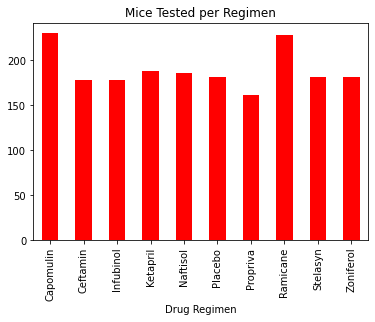

In [8]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
Trials = summary_stats[["Trials"]]
Trials.plot(kind="bar", figsize=(6,4), color = "r", legend=False)
plt.title("Mice Tested per Regimen")
plt.show()

Text(0.5, 0, 'Drug Regimen')

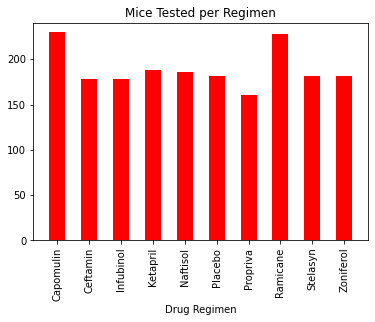

In [28]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = np.arange(len(Trials))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(6,4))
plt.bar(x_axis, Trials["Trials"], color = "r", width=.5)
plt.xticks(tick_locations, Trials.index.values, rotation = "vertical")
plt.xlim(-.75, len(x_axis)-.25)
plt.ylim(0, max(Trials["Trials"])+10)
plt.title("Mice Tested per Regimen")
plt.xlabel("Drug Regimen")


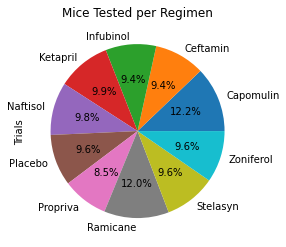

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Trials = summary_stats[["Trials"]]
Trials.plot(kind="pie", labels=Trials.index.values, autopct="%1.1f%%", subplots=True, legend=False)
plt.title("Mice Tested per Regimen")
plt.show()

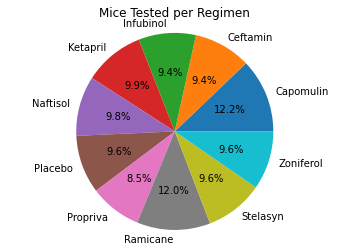

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(Trials["Trials"], labels=Trials.index.values, autopct="%1.1f%%")
plt.axis("equal")
plt.title("Mice Tested per Regimen")
plt.show()

## Quartiles, Outliers and Boxplots

In [73]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
Mouse_group = combine_data.groupby(["Drug Regimen", "Mouse ID"])
Mice_Regimen = Mouse_group.last()
Regimens_4 = [b for b in Regimens]
Output = [Mice_Regiment["Tumor Volume (mm3)"][Regimens]]
Regimens_outputs = pd.DataFrame(Output).transpose().reset_index()
Regimens_outputs



,Drug Regimen,Mouse ID,Tumor Volume (mm3)
0,Capomulin,b128,38.982878
1,Capomulin,b742,38.939633
2,Capomulin,f966,30.485985
3,Capomulin,g288,37.074024
4,Capomulin,g316,40.159220
...,...,...,...
95,Ramicane,s508,30.276232
96,Ramicane,u196,40.667713
97,Ramicane,w678,43.166373
98,Ramicane,y449,44.183451


In [75]:

tumor_volumes = [Regimens_outputs.loc[Regimens_outputs["Drug Regimen"] == Regimens_4[i], "Tumor Volume (mm3)"] for i in range(4)]

for i in range(4):
    quartiles = tumor_vols[i].quantile([.25,.5,.75])
    lower_quartile = quartiles[.25]
    upper_quartile = quartiles[.75]
    IQR = upper_quartile-lower_quartile
    lower_bound = lower_quartile - (1.5*IQR)
    upper_bound = upper_quartile + (1.5*IQR)
    print(f"The IQR for Regimens list {i+1} is {IQR}.")
    if (lower_bound < tumor_vols[i].min()) & (upper_bound > tumor_vols[i].max()):
        print(f"\tThere are no outliers at regimens list {i+1}.")
    else:
        print(f"\tThere is at least 1 outlier at regimens list {i+1}.")

The IQR for Regimens list 1 is 7.781863460000004.
	There are no outliers at regimens list 1.
The IQR for Regimens list 2 is 9.098536719999998.
	There are no outliers at regimens list 2.
The IQR for Regimens list 3 is 11.477135160000003.
	There is at least 1 outlier at regimens list 3.
The IQR for Regimens list 4 is 15.577752179999997.
	There are no outliers at regimens list 4.


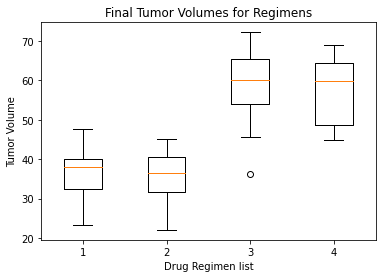

In [76]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volumes for Regimens")
ax1.set_xlabel("Drug Regimen list")
ax1.set_ylabel("Tumor Volume")
ax1.boxplot(tumor_volumes)
plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Tumor Volume of Capomulin mice over Time')

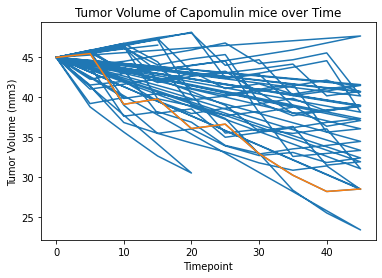

In [103]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_data = combine_data.loc[(combine_data["Drug Regimen"] == "Capomulin"), :]
Cap_Time = Capomulin_data["Timepoint"]
Cap_volume = Capomulin_data["Tumor Volume (mm3)"]
Cap_1_Time = Capomulin_data["Timepoint"][10:20].to_list()
Cap_1_volume = Capomulin_data["Tumor Volume (mm3)"][10:20].to_list()
plt.plot(Cap_Time, Cap_volume)
plt.plot(Cap_1_Time, Cap_1_volume)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume of Capomulin mice over Time")

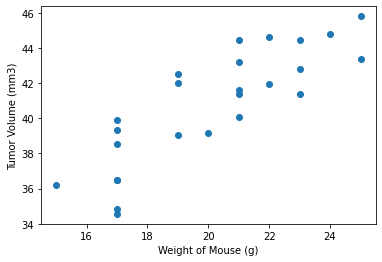

In [105]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_weight = Capomulin_data.groupby(Capomulin_data["Mouse ID"])["Weight (g)"].mean()
tumor_vol = Capomulin_data.groupby(Capomulin_data["Mouse ID"])["Tumor Volume (mm3)"].mean()
plt.scatter(mouse_weight, tumor_vol)
plt.xlabel("Weight of Mouse (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse Weights vs, Average Tumor Volumes")
plt.show()

## Correlation and Regression

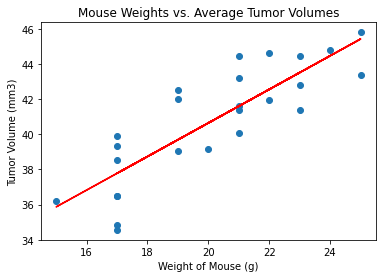

The correlation between Mouse Weights and Tumor volumes is 0.84 for Capomulin Mice.


In [121]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
slope, intercept, rvalue, p_value, std_err = st.linregress(mouse_weight,tumor_vol)
regression_values = mouse_weight * slope + intercept
plt.scatter(mouse_weight, tumor_vol)
plt.plot(mouse_weight, regression_values, "r-")
plt.xlabel("Weight of Mouse (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse Weights vs. Average Tumor Volumes")
plt.show()
print(f"The correlation between Mouse Weights and Tumor volumes is {round(rvalue,2)} for Capomulin Mice.")
